In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,roc_curve,roc_auc_score
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

C:\Users\13679\AppData\Local\Temp\ipykernel_19640\4137939751.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('fraud_oracle.csv')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

## Univariate analysis

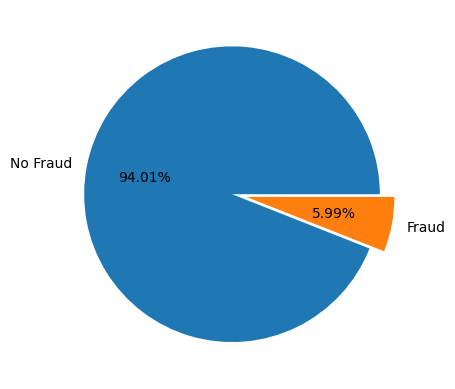

In [5]:
fraud = df['FraudFound_P'].value_counts()
plt.pie(x=fraud.values,autopct='%.2f%%',labels=['No Fraud','Fraud'],explode=(0,0.1))
plt.savefig('pie_chat.png',dpi=600)
plt.show()

In [6]:
df.select_dtypes('O').columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

## Bivariate analysis

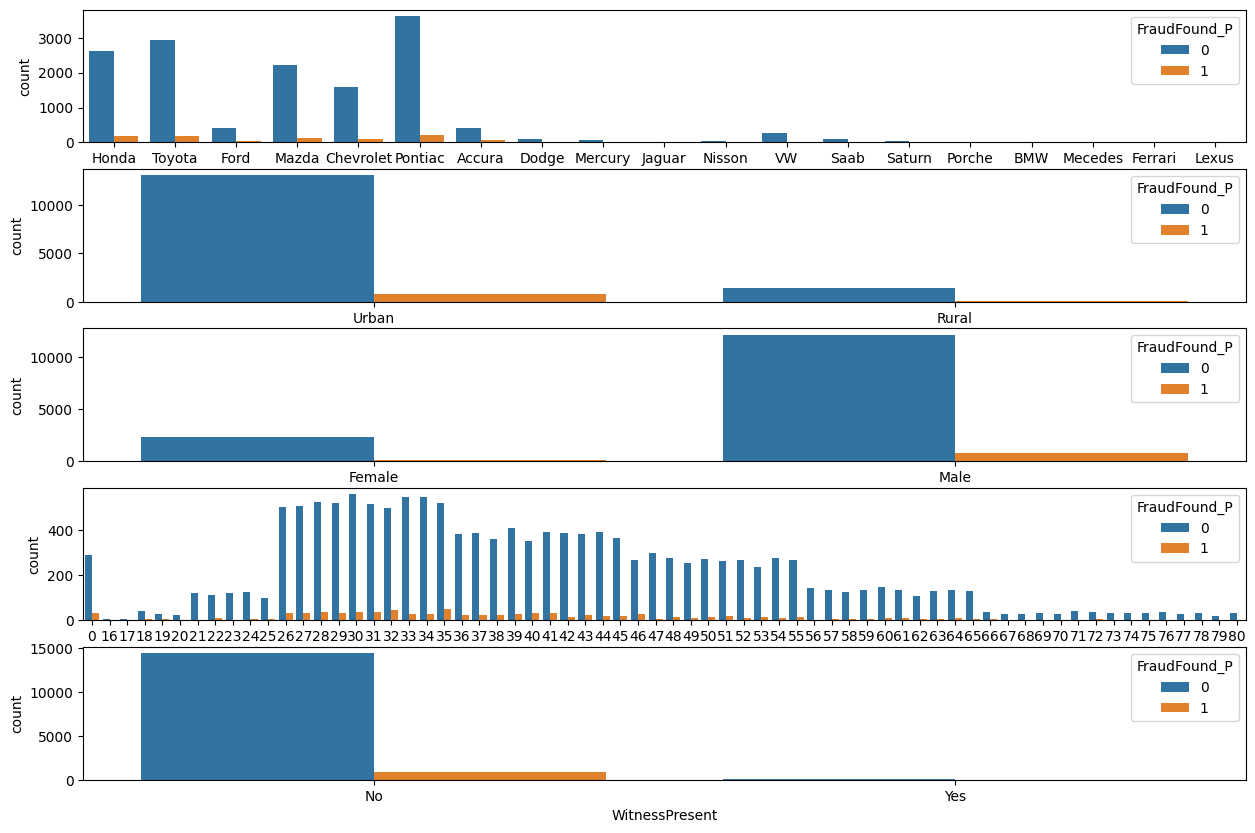

In [7]:
fig,ax = plt.subplots(nrows=5,ncols=1,figsize=(15,10))
for i,col in enumerate(['Make','AccidentArea','Sex','Age','WitnessPresent']):
    sns.countplot(data=df,x=col,hue='FraudFound_P',ax=ax[i])
plt.savefig("bivariate.png")

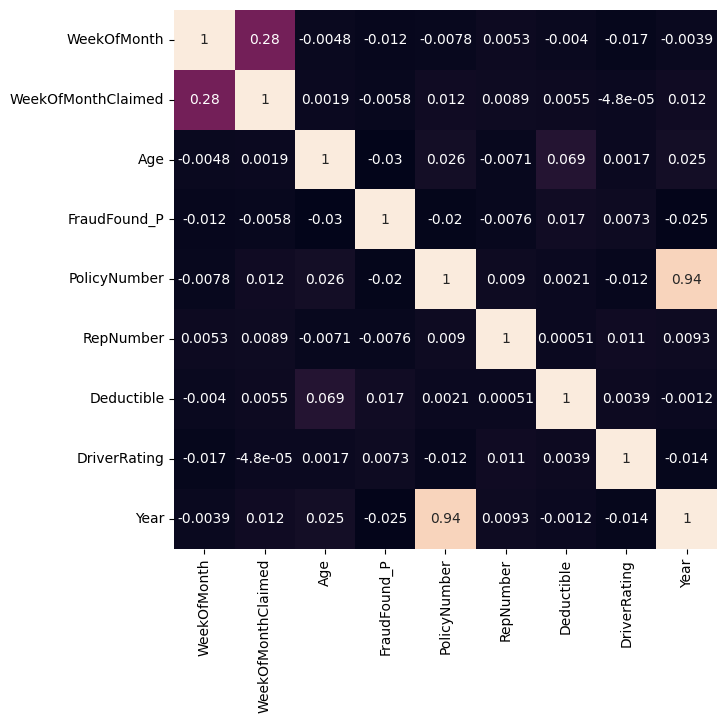

In [8]:
plt.figure(figsize=(7,7))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cbar=False)
plt.savefig('corr.png',dpi=600)

In [9]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [10]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [11]:
mean_age = df['Age'].iloc[df['Age'].values.nonzero()[0]].mean()
df['Age'] = df['Age'].apply(lambda x: mean_age if x==0 else x)

In [12]:
x = df.drop(columns=['PolicyNumber','AgeOfPolicyHolder','BasePolicy','FraudFound_P'],axis=1)
y = df['FraudFound_P']

In [13]:
num_cols = x.select_dtypes('number').columns
scaler = StandardScaler()
scaler.fit(df[num_cols])
df[num_cols] = scaler.transform(x[num_cols])

In [14]:
dummy_cols = ['Make','AccidentArea','Sex','MaritalStatus','Fault','PolicyType','VehicleCategory',\
              'PoliceReportFiled','WitnessPresent','AgentType']
ordinal_cols = ['Month', 'DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice',\
                'Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle','NumberOfSuppliments',\
                'AddressChange_Claim','NumberOfCars']

In [15]:
x = pd.get_dummies(data=x,columns=dummy_cols)

In [16]:
Month_map = {"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
DayOfWeek_map = {"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}
DayOfWeekClaimed_map = DayOfWeek_map.copy()
MonthClaimed_map = Month_map.copy()
VehiclePrice_map = {'less than 20000':0,'20000 to 29000':1,'30000 to 39000':2,'40000 to 59000':3,'60000 to 69000':4,
                     'more than 69000':5}
Days_Policy_Accident_map = {'none':0,'1 to 7':1,'8 to 15':2,'15 to 30':3,'more than 30':4}
Days_Policy_Claim_map = {'none':0,'8 to 15':1,'15 to 30':2,'more than 30':3}
PastNumberOfClaims_map = {'none':0,'1':1,'2 to 4':2,'more than 4':3}
AgeOfVehicle_map = {'new':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,\
                   '6 years':6,'7 years':7,'more than 7':8}
NumberOfSuppliments_map = {'none':0, 'more than 5':4, '1 to 2':1, '3 to 5':3}
AddressChange_Claim_map = {'no change':0,'under 6 months':1,'1 year':2,'2 to 3 years':3,'4 to 8 years':4}
NumberOfCars_map={'1 vehicle':1, '2 vehicles':2, '3 to 4':3, '5 to 8':4, 'more than 8':5}

for col in ordinal_cols:
    map_name = globals()[col+'_map']
    x[col] = x[col].map(map_name)
missing_index = x[x.isnull().any(axis=1)].index
x = x.drop(missing_index)
y = y.drop(missing_index)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

## Predictive Modeling

#### First Try

In [18]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test,lr_pred)
lr_recall = recall_score(y_test,lr_pred)
lr_precision = precision_score(y_test,lr_pred)
lr_f1 = f1_score(y_test,lr_pred)
print(f'LR,accuracy:{lr_acc:.4f},recall:{lr_recall:.4f},precision:{lr_precision:.4f},f1:{lr_f1:.4f}')

LR,accuracy:0.9401,recall:0.0000,precision:0.0000,f1:0.0000


In [19]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(y_test,dt_pred)
dt_recall = recall_score(y_test,dt_pred)
dt_precision = precision_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred)
dt_acc,dt_recall,dt_precision,dt_f1
print(f'Decision Tree,accuracy:{dt_acc:.4f},recall:{dt_recall:.4f},precision:{dt_precision:.4f},f1:{dt_f1:.4f}')

Decision Tree,accuracy:0.9025,recall:0.2347,precision:0.2138,f1:0.2238


In [20]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(y_test,rf_pred)
rf_recall = recall_score(y_test,rf_pred)
rf_precision = precision_score(y_test,rf_pred)
rf_f1 = f1_score(y_test,rf_pred)
print(f'Random Forest,accuracy:{rf_acc:.4f},recall:{rf_recall:.4f},precision:{rf_precision:.4f},f1:{rf_f1:.4f}')

Random Forest,accuracy:0.9401,recall:0.0036,precision:0.5000,f1:0.0072


In [21]:
lgbm = lgb.LGBMClassifier(random_state=0,class_weight='balanced')
lgbm.fit(x_train,y_train)
lgbm_pred = lgbm.predict(x_test)
lgbm_acc = accuracy_score(y_test,lgbm_pred)
lgbm_recall = recall_score(y_test,lgbm_pred)
lgbm_precision = precision_score(y_test,lgbm_pred)
lgbm_f1 = f1_score(y_test,lgbm_pred)
print(f'LightGBM,accuracy:{lgbm_acc:.4f},recall:{lgbm_recall:.4f},precision:{lgbm_precision:.4f},f1:{lgbm_f1:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 646, number of negative: 10147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 10793, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM,accuracy:0.8420,recall:0.6065,precision:0.2127,f1:0.3149


#### Balanced

In [22]:
print("Adding class weight!!!")
print(".......")
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test,lr_pred)
lr_recall = recall_score(y_test,lr_pred)
lr_precision = precision_score(y_test,lr_pred)
lr_f1 = f1_score(y_test,lr_pred)
print(f'LR,accuracy:{lr_acc:.4f},recall:{lr_recall:.4f},precision:{lr_precision:.4f},f1:{lr_f1:.4f}')

dt = DecisionTreeClassifier(random_state=0,class_weight='balanced')
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_acc = accuracy_score(y_test,dt_pred)
dt_recall = recall_score(y_test,dt_pred)
dt_precision = precision_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred)
dt_acc,dt_recall,dt_precision,dt_f1
print(f'Decision Tree,accuracy:{dt_acc:.4f},recall:{dt_recall:.4f},precision:{dt_precision:.4f},f1:{dt_f1:.4f}')

rf = RandomForestClassifier(random_state=0,class_weight='balanced')
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(y_test,rf_pred)
rf_recall = recall_score(y_test,rf_pred)
rf_precision = precision_score(y_test,rf_pred)
rf_f1 = f1_score(y_test,rf_pred)
print(f'Random Forest,accuracy:{rf_acc:.4f},recall:{rf_recall:.4f},precision:{rf_precision:.4f},f1:{rf_f1:.4f}')

lgbm = lgb.LGBMClassifier(random_state=0,class_weight='balanced')
lgbm.fit(x_train,y_train)
lgbm_pred = lgbm.predict(x_test)
lgbm_acc = accuracy_score(y_test,lgbm_pred)
lgbm_recall = recall_score(y_test,lgbm_pred)
lgbm_precision = precision_score(y_test,lgbm_pred)
lgbm_f1 = f1_score(y_test,lgbm_pred)
print(f'LightGBM,accuracy:{lgbm_acc:.4f},recall:{lgbm_recall:.4f},precision:{lgbm_precision:.4f},f1:{lgbm_f1:.4f}')

Adding class weight!!!
.......
LR,accuracy:0.6444,recall:0.8736,precision:0.1307,f1:0.2273
Decision Tree,accuracy:0.9023,recall:0.2455,precision:0.2186,f1:0.2313
Random Forest,accuracy:0.9406,recall:0.0108,precision:0.7500,f1:0.0214
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 646, number of negative: 10147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 10793, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM,accuracy:0.8420,recall:0.6065,precision:0.2127,f1:0.3149


## Hyper-parameter tunning

In [23]:
lr_param = {'penalty':['None','l1','l2','elasticnet'],\
            'C':[0.001,0.01,0.1,1,10,100,1000]
           }
scoring = make_scorer(fbeta_score,beta=0.3)
lr_clf = GridSearchCV(LogisticRegression(class_weight='balanced'),lr_param,cv=5,scoring='f1')
lr_clf.fit(x_train,y_train)
best_lr = lr_clf.best_estimator_
best_lr.fit(x_train,y_train)
best_lr_pred = best_lr.predict(x_test)
print(f'Best parameter combination: {lr_clf.best_params_}')
print(f'LR,accuracy:{accuracy_score(y_test,best_lr_pred):.4f},recall:{recall_score(y_test,best_lr_pred):.4f},\
precision:{precision_score(y_test,best_lr_pred):.4f},f1:{f1_score(y_test,best_lr_pred):.4f}')

Best parameter combination: {'C': 0.01, 'penalty': 'l2'}
LR,accuracy:0.6550,recall:0.8628,precision:0.1330,f1:0.2305


In [24]:
dt_param = {'criterion':['gini', 'entropy'],\
            'max_depth':[20,30,35,40],\
            'min_samples_split':[2,3,4],\
            'min_samples_leaf':[1,2,3]
           }

dt_clf = GridSearchCV(DecisionTreeClassifier(class_weight='balanced',random_state=0),dt_param,cv=5,scoring='f1')
dt_clf.fit(x_train,y_train)
best_dt = dt_clf.best_estimator_
best_dt.fit(x_train,y_train)
best_dt_pred = best_dt.predict(x_test)
print(f'Best parameter combination: {dt_clf.best_params_}')
print(f'dt,accuracy:{accuracy_score(y_test,best_dt_pred):.4f},recall:{recall_score(y_test,best_dt_pred):.4f},\
precision:{precision_score(y_test,best_dt_pred):.4f},f1:{f1_score(y_test,best_dt_pred):.4f}')

Best parameter combination: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4}
dt,accuracy:0.8502,recall:0.4188,precision:0.1790,f1:0.2508


In [25]:
rf_param = {'n_estimators':[60,80,100],\
            'criterion':['gini', 'entropy'],\
            'max_depth':[15,20,30],\
            'min_samples_split':[2,3,4],\
            'min_samples_leaf':[1,2],\
            
           }

rf_clf = GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=0),rf_param,cv=5,scoring='f1')
rf_clf.fit(x_train,y_train)
best_rf = rf_clf.best_estimator_
best_rf.fit(x_train,y_train)
best_rf_pred = best_rf.predict(x_test)
print(f'Best parameter combination: {rf_clf.best_params_}')
print(f'rf,accuracy:{accuracy_score(y_test,best_rf_pred):.4f},recall:{recall_score(y_test,best_rf_pred):.4f},\
precision:{precision_score(y_test,best_rf_pred):.4f},f1:{f1_score(y_test,best_rf_pred):.4f}')

Best parameter combination: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 60}
rf,accuracy:0.8949,recall:0.2563,precision:0.2023,f1:0.2261


In [ ]:
lgbm_param = {'n_estimators':[100,120,140,160],\
              'learning_rate':[0.01,0.1],\
              'num_leaves':[20,31,40],\
              'max_depth':[10,20,30,40]
             }

lgbm_clf = GridSearchCV(lgb.LGBMClassifier(class_weight='balanced',verbose=-1),lgbm_param,cv=5,scoring='f1')
lgbm_clf.fit(x_train,y_train)
best_lgbm = lgbm_clf.best_estimator_
#best_lgbm.fit(x_train,y_train)
best_lgbm_pred = best_lgbm.predict(x_test)
print(f'Best parameter combination: {lgbm_clf.best_params_}')
print(f'lgbm,accuracy:{accuracy_score(y_test,best_lgbm_pred):.4f},recall:{recall_score(y_test,best_lgbm_pred):.4f},\
precision:{precision_score(y_test,best_lgbm_pred):.4f},f1:{f1_score(y_test,best_lgbm_pred):.4f}')

In [ ]:
## draw roc curves for different models in one figure
def ROC(model_list,data,label,model_name):
    plt.figure(figsize=(5,5))
    for i,obj in enumerate(model_list):
        pred_prob = obj.predict_proba(data)[:,1]
        fpr,tpr,th = roc_curve(label,pred_prob)
        auc = np.round(roc_auc_score(label,pred_prob),4)
        plt.plot(fpr,tpr,label=f'{model_name[i]},AUC:{auc}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0,1],[0,1],'--')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend()
    plt.savefig('roc_curve_after_tunning.png',dpi=600)
    
ROC([best_lr,best_dt,best_rf,best_lgbm],x_test,y_test,['Logistic Regression','Decision Tree','Random Forest','LightGBM'])   

In [ ]:
plt.figure(figsize=(8,10))
lgbm_importance = pd.Series(data=best_lgbm.feature_importances_,index=best_lgbm.feature_names_in_)
lgbm_importance.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature importance in LightGBm')
plt.savefig("feature_importance.png",dpi=600)

## Sampling strategy